# Corporate Credit Rating Prediction

Is it possible to predict the credit rating of a company with its financial Ratios?



## The Dataset

- **Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, daysOfInventoryOutstanding, operatingCycle, daysOfPayablesOutstanding, cashConversionCycle

- **Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, netIncomePerEBT, ebtPerEbit, ebitPerRevenue

- **Debt Ratios**: debtRatio, debtEquityRatio, longTermDebtToCapitalization, totalDebtToCapitalization, interestCoverage, cashFlowToDebtRatio, companyEquityMultiplier

- **Operating Performance Ratios**: receivablesTurnover, payablesTurnover, inventoryTurnover, fixedAssetTurnover, assetTurnover Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, payoutRatio, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio, cashFlowCoverageRatios, shortTermCoverageRatios, capitalExpenditureCoverageRatio, dividendPaidAndCapexCoverageRatio, dividendPayoutRatio, 


#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## Data Exploration

In [87]:
df_rating = pd.read_csv('data/rating_dataframe.csv')

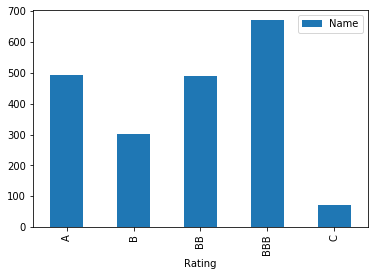

In [90]:
df_rating_summary = df_rating.groupby('Rating').count().reset_index()
df_rating_summary.plot.bar(x='Rating', y='Name')

It is better to join all the A's together. 

In [89]:
df_rating.loc[df_rating['Rating'] == 'AA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'AAA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'CC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'CCC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'D','Rating'] = 'C'

#### Plot Distributions 

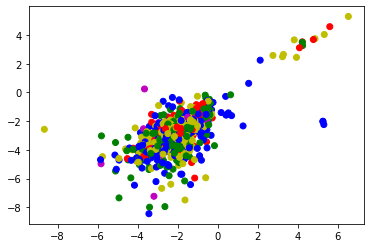

In [106]:
plt.scatter(np.log(df_rating.operatingCashFlowSalesRatio), np.log(df_rating.netProfitMargin), c= df_rating.color)

In [93]:
df_rating.colors = 'a'
df_rating.loc[df_rating['Rating'] == 'A', 'color'] = 'r'
df_rating.loc[df_rating['Rating'] == 'B', 'color'] = 'g'
df_rating.loc[df_rating['Rating'] == 'BB', 'color'] = 'b'
df_rating.loc[df_rating['Rating'] == 'BBB','color'] = 'y'
df_rating.loc[df_rating['Rating'] == 'C', 'color'] = 'm'

In [104]:
df_rating.columns

Index(['Rating', 'Name', 'Symbol', 'Sector', 'Rating Agency Name', 'Date',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover', 'payoutRatio',
       'color'],
      dtype='object')

# PCA

In [116]:
from sklearn.preprocessing import StandardScaler

In [122]:
features = df_rating.columns[6:]
# Separating out the features
x = df_rating.loc[:, features].values
# Separating out the target
y = df_rating.loc[:,['Rating']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2','pca3', 'pca4', 'pca5'])

In [154]:
finalDf = pd.concat([principalDf, df_rating[['Rating']]], axis = 1)

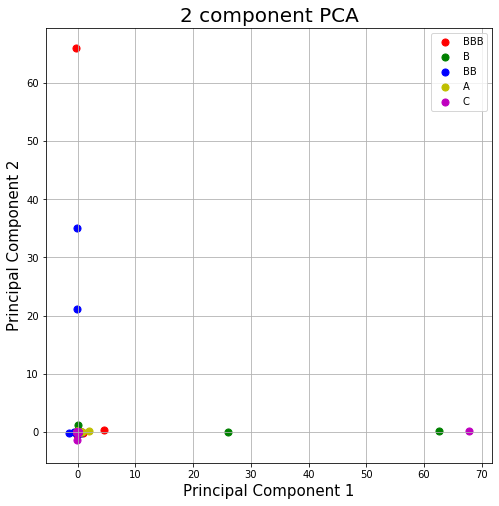

In [158]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(df_rating.Rating))
colors = ['r', 'g', 'b','y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca2'], 
               finalDf.loc[indicesToKeep, 'pca3'], 
               c = color, 
               s = 50)

ax.legend(targets)
ax.grid()

In [161]:
sum(pca.explained_variance_ratio_)

0.6243066249488625

In [219]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#### Train and Test

In [227]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), finalDf.iloc[:,5]

In [229]:
X = X.apply(np.log)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [270]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

In [271]:
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [272]:
model = clf.fit(X_std, y_train)

# Random Forest

In [266]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df_rating.iloc[:,6:], df_rating.iloc[:,0]

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [269]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5763546798029556
